In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

### Importação da base de dados e tratamento inicial
#### Fonte: https://www.kaggle.com/berkerisen/wind-turbine-scada-dataset

In [110]:
dados = pd.read_csv('T1.csv')
dados.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [111]:
dados.columns = ['Data/Hora', 'Potência(kw)', 'Velocidade do vento(m/s)', 'Curva teórica(kWh)', 'Direção do Vento(°)']

In [112]:
del dados['Direção do Vento(°)']

In [113]:
dados.head()

,Data/Hora,Potência(kw),Velocidade do vento(m/s),Curva teórica(kWh)
0,01 01 2018 00:00,380.047791,5.311336,416.328908
1,01 01 2018 00:10,453.769196,5.672167,519.917511
2,01 01 2018 00:20,306.376587,5.216037,390.900016
3,01 01 2018 00:30,419.645905,5.659674,516.127569
4,01 01 2018 00:40,380.650696,5.577941,491.702972


### Vizualizações



###### O gráfico representa curva teórica que também esta no dataframe.

In [114]:
dados['Data/Hora'] = pd.to_datetime(dados['Data/Hora'], format='%d %m %Y %H:%M')

In [115]:
dados.set_index('Data/Hora', inplace=True)

In [116]:
dados.head()

,Potência(kw),Velocidade do vento(m/s),Curva teórica(kWh)
Data/Hora,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908
2018-01-01 00:10:00,453.769196,5.672167,519.917511
2018-01-01 00:20:00,306.376587,5.216037,390.900016
2018-01-01 00:30:00,419.645905,5.659674,516.127569
2018-01-01 00:40:00,380.650696,5.577941,491.702972


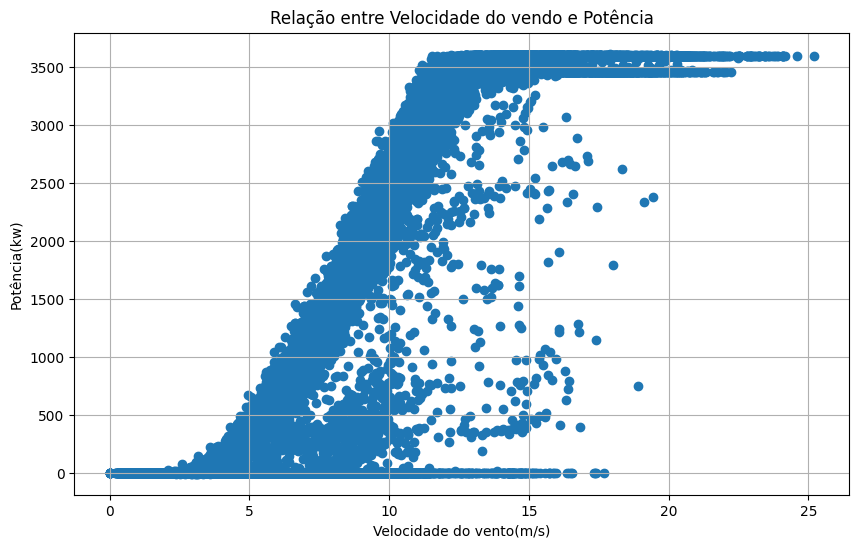

In [117]:
plt.figure(figsize=(10, 6))
plt.scatter(dados['Velocidade do vento(m/s)'], dados['Potência(kw)'])
plt.title('Relação entre Velocidade do vendo e Potência')
plt.xlabel('Velocidade do vento(m/s)')
plt.ylabel('Potência(kw)')
plt.grid(True)
plt.show()

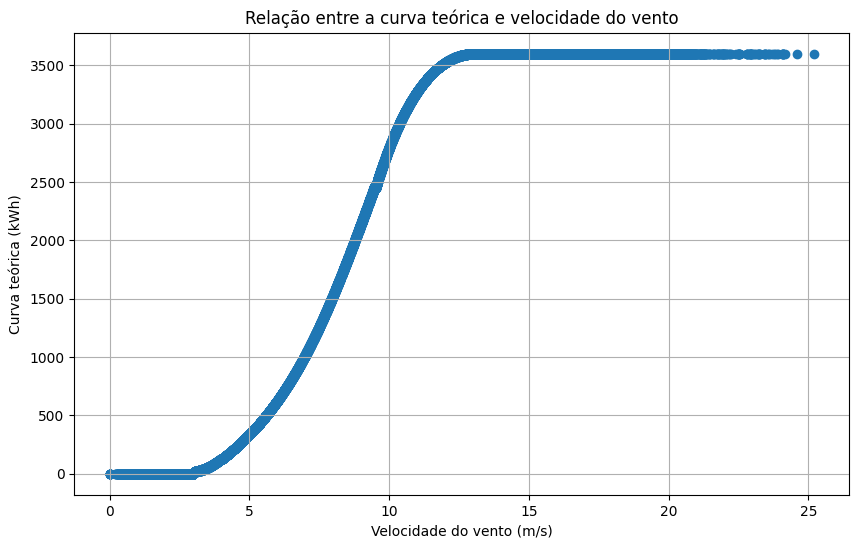

In [118]:
plt.figure(figsize=(10,6))
plt.scatter(dados['Velocidade do vento(m/s)'], dados['Curva teórica(kWh)'])
plt.title('Relação entre a curva teórica e velocidade do vento')
plt.xlabel('Velocidade do vento (m/s)')
plt.ylabel('Curva teórica (kWh)')
plt.grid()
plt.show()

##### Agrupando os dados por mês e calculando a média mensal de cada atributo.

In [119]:
dados.resample('M').mean()

,Potência(kw),Velocidade do vento(m/s),Curva teórica(kWh)
Data/Hora,,,
2018-01-31,1323.157951,8.550920,1847.287918
2018-02-28,1503.355020,8.620697,1712.709958
2018-03-31,1952.405766,9.734390,2075.819877
2018-04-30,824.358603,5.852096,955.690141
2018-05-31,836.941996,5.859028,960.203607
2018-06-30,995.490376,6.342205,1139.291376
2018-07-31,477.014298,4.950335,583.709297
2018-08-31,1978.188795,9.339899,2220.579161
2018-09-30,1429.484639,7.583327,1553.319599


##### Agrupando os dados por dia e calculando a soma de cada atributo para analisar totalizações diárias de cada um dos atributos.

In [120]:
dados.resample('D').sum()

,Potência(kw),Velocidade do vento(m/s),Curva teórica(kWh)
Data/Hora,,,
2018-01-01,221069.445599,1155.308353,233710.566903
2018-01-02,458289.251953,1728.078880,477315.859817
2018-01-03,146562.240988,957.627257,154505.715976
2018-01-04,105979.832367,791.531488,106484.812224
2018-01-05,17815.297732,449.486437,18769.289899
...,...,...,...
2018-12-27,0.000000,498.415094,14472.857153
2018-12-28,20277.130661,534.476387,25903.554185
2018-12-29,31415.276101,891.476897,119669.963887


#### Criando "limites aceitáveis" baseados na curva teórica

In [121]:
potencia_real = dados['Potência(kw)'].tolist()
potencia_teorica = dados['Curva teórica(kWh)'].tolist()
potencia_max = []
potencia_mim = []
dentro_do_limite = []

for potencia in potencia_teorica:
    potencia_max.append(potencia*1.05) #5% pra cima
    potencia_mim.append(potencia*0.95) #5% pra baixo

#print(len(potencia_max), len(potencia_mim), len(potencia_teorica))

for i, potencia in enumerate(potencia_real):
    if potencia >= potencia_mim[i] and potencia <= potencia_max[i]:
        dentro_do_limite.append('Dentro')
    elif potencia == 0:
        dentro_do_limite.append('Zero')
    else:
        dentro_do_limite.append('Fora')

print(dentro_do_limite.count('Dentro')/len(dentro_do_limite)*100,'%')

37.286760340391844 %


### Adcionando lista dentro_do_limite ao dataframe

In [122]:
dados['Dentro do limite'] = dentro_do_limite

In [123]:
dados.head()

,Potência(kw),Velocidade do vento(m/s),Curva teórica(kWh),Dentro do limite
Data/Hora,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora


### Gráfico que mostra valores fora e dentro do limite de 5% pra cima ou pra baixo

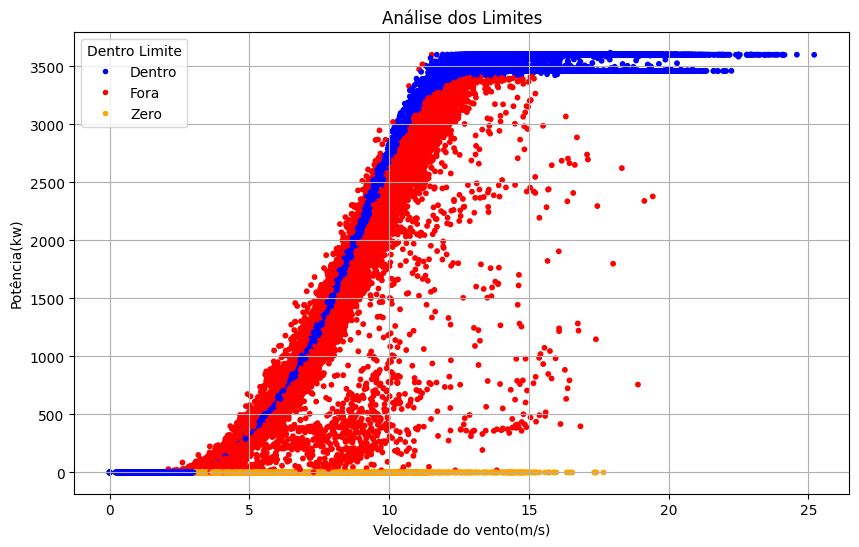

In [126]:
cores = {'Dentro': 'blue', 'Fora': 'red', 'Zero': 'orange'}
colors = dados['Dentro do limite'].map(cores)

plt.figure(figsize=(10, 6))
plt.scatter(dados['Velocidade do vento(m/s)'], dados['Potência(kw)'], c=colors, s=10) # Ajuste o tamanho do ponto conforme necessário
plt.title('Análise dos Limites')
plt.xlabel('Velocidade do vento(m/s)')
plt.ylabel('Potência(kw)')
plt.grid(True)

marcador = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cor, markersize=5) for cor in cores.values()]
lengenda = cores.keys()
plt.legend(marcador, lengenda, title='Dentro Limite')

plt.show()